In [1]:
# --- Step 1: Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

import os
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import SequenceMatcher

# --- Step 2: Set the folder path ---
# Change this to your Google Drive folder containing the TXT files
folder_path = '/content/drive/MyDrive/national_cybersecurity_policies_data/national_cybersecurity_strategies_v1.0/All_PDF_Parsing_Files/Other/Non-Marker_Inaugural_TXTs'

# --- Step 3: Read all txt files & extract year, month, day, language ---
data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read()
        except:
            with open(file_path, 'r', encoding='latin-1') as f:
                content = f.read()

        # Extract metadata from filename
        # Expected format: YYYYMMDD_Country_Title_LANG.txt
        match = re.match(r'(\d{4})(\d{2})(\d{2})_.*_([A-Z]{3})\.txt', file_name)
        if match:
            year = int(match.group(1))
            month = int(match.group(2))
            day = int(match.group(3))
            language = match.group(4)

            data.append({
                'file_name': file_name,
                'year': year,
                'month': month,
                'day': day,
                'language': language,
                'content': content
            })

# Create DataFrame
df = pd.DataFrame(data)

# Save CSV
csv_path = '/content/drive/MyDrive/cybersecurity_docs.csv'
df.to_csv(csv_path, index=False)
print(f"CSV saved to {csv_path}")

df.head()

Mounted at /content/drive
CSV saved to /content/drive/MyDrive/cybersecurity_docs.csv


,file_name,year,month,day,language,content
0,20150723_Ghana_National Cybersecurity Strategy...,2015,7,23,ENG,\n \n \n \n \n \nREPUBLIC OF GHANA \n \n \nMI...
1,20161027_Sierra Leone_National Cybersecurity S...,2016,10,27,ENG,\n \n \nNational Cyber Security \nand Data Pr...
2,20110629_Lithuania_National Cybersecurity Stra...,2011,6,29,ENG,\n \n \nGOVERNMENT OF THE REPUBLIC OF LITHUAN...
3,20130101_Spain_National Cybersecurity Strategy...,2013,1,1,ESP,2013\nESTRATEGIA DE \nCIBERSEGURIDAD\nNACIONAL...
4,20160223_Uzbekistan_National Cybersecurity Str...,2016,2,23,RUS,\nПриложение № 10 \nк протоколу Республиканск...


In [2]:
# --- Step 2: Set parent folder path ---
parent_folder = '/content/drive/MyDrive/national_cybersecurity_policies_data/national_cybersecurity_strategies_v1.0/All_PDF_Parsing_Files/Marker_Inaugural_Folders'

# --- Step 3: Loop through subfolders ---
data = []
for folder_name in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder_name)
    if os.path.isdir(folder_path):
        # Construct expected TXT filename
        txt_filename = folder_name + ".txt"
        txt_path = os.path.join(folder_path, txt_filename)

        # Check if file exists
        if os.path.exists(txt_path):
            try:
                with open(txt_path, 'r', encoding='utf-8') as f:
                    content = f.read()
            except:
                with open(txt_path, 'r', encoding='latin-1') as f:
                    content = f.read()

            # Extract year, month, day, language
            match = re.match(r'(\d{4})(\d{2})(\d{2})_.*_([A-Z]{3})$', folder_name)
            if match:
                year = int(match.group(1))
                month = int(match.group(2))
                day = int(match.group(3))
                language = match.group(4)

                data.append({
                    'file_name': txt_filename,
                    'year': year,
                    'month': month,
                    'day': day,
                    'language': language,
                    'content': content
                })
# --- Step 4: Create DataFrame and save CSV ---
df_marker = pd.DataFrame(data)
csv_path = '/content/drive/MyDrive/cybersecurity_docs_marker.csv'
df_marker.to_csv(csv_path, index=False)
print(f"CSV saved to {csv_path}")

df_marker.head()

CSV saved to /content/drive/MyDrive/cybersecurity_docs_marker.csv


,file_name,year,month,day,language,content
0,20240528_Argentina_National Cybersecurity Stra...,2024,5,28,ESP,ESTRATEGIA NACIONAL DE CIBERSEGURIDAD DE LA RE...
1,20160501_Tanzania_National Cybersecurity Strat...,2016,5,1,ENG,\nTHE UNITED REPUBLIC OF TANZANIA MINISTRY OF ...
2,20120101_Georgia_National Cybersecurity Strate...,2012,1,1,ENG,\nCyber Security Strategy of Georgia\n2012-201...
3,20101220_Burkina Faso_National Cybersecurity_F...,2010,12,20,FRN,PLAN NATIONAL DE CYBERSECURITE REALISE A LA DE...
4,20200929_Nicaragua_National Cybersecurity Stra...,2020,9,29,ESP,Legislación de Nicaragua Normas Jurídicas\n\nC...


In [3]:
# --- Step 1: Merge original df with df_marker, reset index ---
df = pd.concat([df, df_marker], ignore_index=True)

# --- Step 2: Keep only rows where language is English (ENG) ---
df_eng = df[df['language'] == 'ENG']
print(len(df_eng))  # print number of English rows

# --- Step 3: Remove duplicate rows based on file_name, keep first occurrence ---
df_eng = df_eng.drop_duplicates(subset=['file_name'], keep='first')
print(len(df_eng))  # print number of rows after removing duplicate filenames

# --- Step 4: Extract country code from file_name (split by '_') ---
# If file_name = "doc_USA_2020.pdf", this will assign "USA" to 'country'
df_eng['country'] = df_eng['file_name'].apply(lambda x: x.split('_')[1] if '_' in x else None)
print(len(df_eng))  # row count remains unchanged

# --- Step 5: Remove duplicate records with the same date + country combination ---
df_eng = df_eng.drop_duplicates(subset=['year', 'month', 'day', 'country'], keep='first')
print(len(df_eng))  # row count remains unchanged

99
99
99
98


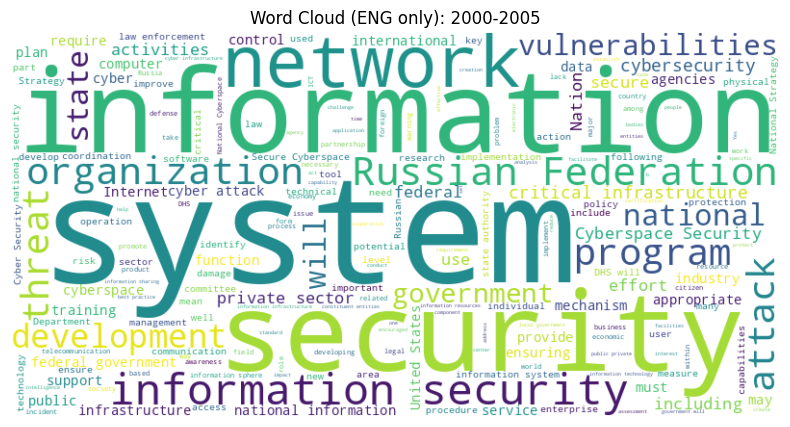

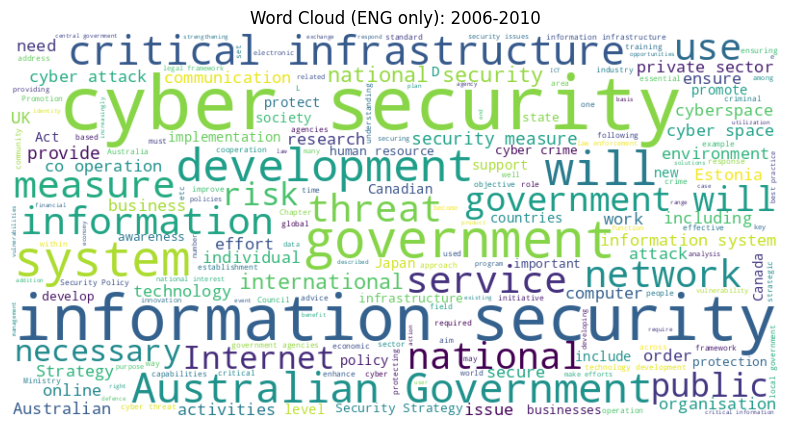

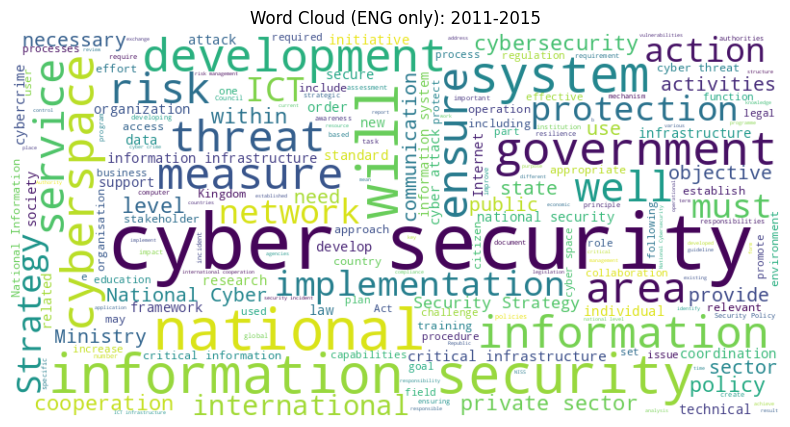

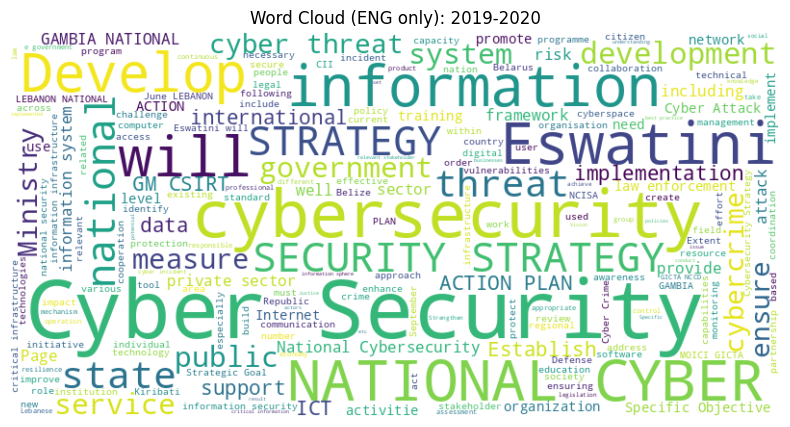

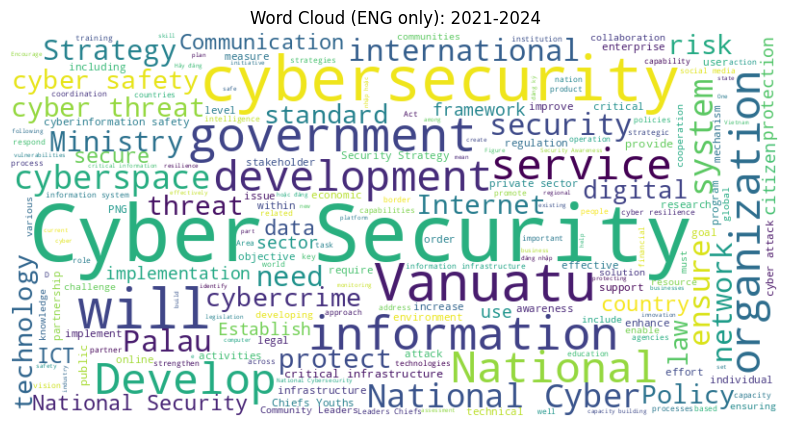

In [ ]:
# --- Step 5: Word Clouds for ENG only ---
# dataframe used: df_eng
time_ranges = {
    '2000-2005': (2000, 2005),
    '2006-2010': (2006, 2010),
    '2011-2015': (2011, 2015),
    '2019-2020': (2019, 2020),
    '2021-2024': (2021, 2024)
}

for label, (start, end) in time_ranges.items():
    subset = df_eng[(df_eng['year'] >= start) & (df_eng['year'] <= end)]
    if not subset.empty:
        combined_text = ' '.join(subset['content'].tolist())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        print(f"word_cloud_{start}_{end}")
        plt.title(f"Word Cloud (ENG only): {label}")
        plt.show()

In [4]:
pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.3 MB/s eta 0:00:00


In [5]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from docx import Document  # for Word export

# --- Create folder if not exists ---
output_folder = "text_analysis_descriptives"
os.makedirs(output_folder, exist_ok=True)

# --- Define time ranges ---
time_ranges = {
    '2000-2005': (2000, 2005),
    '2006-2010': (2006, 2010),
    '2011-2015': (2011, 2015),
    '2019-2020': (2016, 2020),
    '2021-2024': (2021, 2024)
}

# --- Create Word Document for table ---
doc = Document()
doc.add_heading("Word Cloud Document Summary", level=1)

table = doc.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Period"
hdr_cells[1].text = "Document Count"
hdr_cells[2].text = "Countries (Years)"

# --- Generate word clouds for each period ---
for label, (start, end) in time_ranges.items():
    subset = df_eng[(df_eng['year'] >= start) & (df_eng['year'] <= end)]

    if not subset.empty:
        combined_text = ' '.join(subset['content'].tolist())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

        # Save word cloud image (no title)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        filename = f"word_cloud_{start}_{end}.png"
        plt.savefig(os.path.join(output_folder, filename), bbox_inches='tight')
        plt.close()

        # Prepare country-year list
        country_years = [f"{row['country']} ({row['year']})" for _, row in subset.iterrows()]
        country_years_str = ", ".join(country_years)

        # Add row to Word table
        row_cells = table.add_row().cells
        row_cells[0].text = f"{start}-{end}"
        row_cells[1].text = str(len(subset))
        row_cells[2].text = country_years_str

# --- Create one "all periods" word cloud ---
subset_all = df_eng[(df_eng['year'] >= 2000) & (df_eng['year'] <= 2024)]
if not subset_all.empty:
    combined_text = ' '.join(subset_all['content'].tolist())
    wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_all, interpolation='bilinear')
    plt.axis('off')
    filename = "word_cloud_2000_2024.png"
    plt.savefig(os.path.join(output_folder, filename), bbox_inches='tight')
    plt.close()

    # Add row for all-period summary
    country_years_all = [f"{row['country']} ({row['year']})" for _, row in subset_all.iterrows()]
    row_cells = table.add_row().cells
    row_cells[0].text = "2000-2024 (All)"
    row_cells[1].text = str(len(subset_all))
    row_cells[2].text = ", ".join(country_years_all)

# --- Save Word document ---
doc.save(os.path.join(output_folder, "wordcloud_summary.docx"))

In [6]:
import shutil

# Zip the folder
shutil.make_archive("text_analysis_descriptives", 'zip', "text_analysis_descriptives")

# Download it
from google.colab import files
files.download("text_analysis_descriptives.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

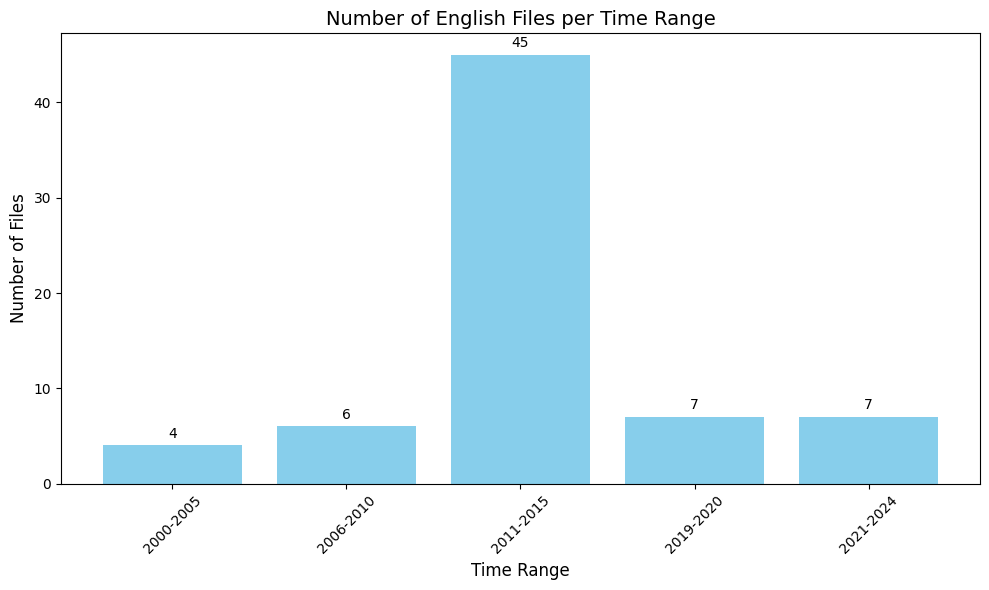

In [ ]:
import matplotlib.pyplot as plt

# Count number of files in each time range
time_counts = {}
for label, (start, end) in time_ranges.items():
    count = df_eng[(df_eng['year'] >= start) & (df_eng['year'] <= end)].shape[0]
    time_counts[label] = count

# Convert to lists for plotting
labels = list(time_counts.keys())
counts = list(time_counts.values())

# Plot bar chart with labels
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='skyblue')
plt.xlabel('Time Range', fontsize=12)
plt.ylabel('Number of Files', fontsize=12)
plt.title('Number of English Files per Time Range', fontsize=14)
plt.xticks(rotation=45)

# Annotate counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# --- Step 6: Show language and year distribution ---

# Year distribution
# print(df['year'].value_counts().sort_index())
# print(df['language'].value_counts().sort_index())

import re

# Known language codes (from your counts)
LANG_CODES = ['ENG','ARA','BGR','DAN','ESP','FRA','FRN','GRC','KAZ','KOR','KYR','LTV','MKD','MON','NRW','POR','RUS','THA','TUR','UKR']

# --- Robust doc_id: remove a trailing _<LANG> token before underscore/dot/end ---
# e.g., "US_2020_STRAT_ENG.pdf" -> "US_2020_STRAT.pdf"
def strip_lang_token(fn: str) -> str:
    return re.sub(r'_(?:' + '|'.join(LANG_CODES) + r')(?=(_|\.|$))', '', str(fn))

df = df.copy()
df['doc_id'] = df['file_name'].map(strip_lang_token)

# --- Deduplicate with English priority ---
# eng_first=False for ENG, True for others → ENG sorts first within each doc_id
df_unique = (
    df.assign(eng_first=(df['language'] != 'ENG'))
      .sort_values(['doc_id', 'eng_first', 'year'], ascending=[True, True, False])
      .drop_duplicates(subset='doc_id', keep='first')
)
# Now use df_unique for BOTH plots so:
#  - Language distribution counts ENG if a doc exists in both ENG + native (native excluded)
#  - Year distribution doesn't double-count multi-language docs

In [ ]:
df_unique

,file_name,year,month,day,language,content,doc_id,eng_first
55,20000909_Russia_National Cybersecurity Strateg...,2000,9,9,ENG,INFORMATION SECURITY DOCTRINE OF THE RUSSIAN F...,20000909_Russia_National Cybersecurity Strateg...,False
106,20030201_USA_National Cybersecurity Strategy_E...,2003,2,1,ENG,010101110101011110 0 0111010101101101010101011...,20030201_USA_National Cybersecurity Strategy.txt,False
92,20031105_Tajikistan_National Cybersecurity Str...,2003,11,5,ENG,PRESIDENTIAL DECREE OF THE REPUBLIC OF TAJIKIS...,20031105_Tajikistan_National Cybersecurity Str...,False
43,20050101_Philippines_National Cybersecurity St...,2005,1,1,ENG,Philippine National Cyber Security Plan 2005 E...,20050101_Philippines_National Cybersecurity St...,False
125,20060101_Malaysia_National Cybersecurity Strat...,2006,1,1,ENG,\n\nNational Cyber Security\n©Ministry of Scie...,20060101_Malaysia_National Cybersecurity Strat...,False
...,...,...,...,...,...,...,...,...
98,20221201_Niger_National Cybersecurity Strategy...,2022,12,1,FRN,Niger-Technologies-information\nLe Niger se do...,20221201_Niger_National Cybersecurity Strategy...,True
11,20240101_Togo_National Cybersecurity Strategy_...,2024,1,1,FRN,Stratégie Nationale de SHHHIE\n\n2024-2028 |\n...,20240101_Togo_National Cybersecurity Strategy.txt,True
34,20240404_Papua New Guinea_National Cybersecuri...,2024,4,4,ENG,\nTHE INDEPENDENT STATE OF PAPUA NEW GUINEA\nN...,20240404_Papua New Guinea_National Cybersecuri...,False
24,20240528_Argentina_National Cybersecurity Stra...,2024,5,28,ESP,ESTRATEGIA NACIONAL DE CIBERSEGURIDAD DE LA RE...,20240528_Argentina_National Cybersecurity Stra...,True


In [ ]:
df_unique['language'].value_counts()

,count
language,
ENG,99
FRN,12
ESP,8
ARA,3
POR,2
RUS,2
LTV,1
UKR,1
FRA,1


In [ ]:
year_counts = df_unique['year'].value_counts().sort_index()

plt.figure(figsize=(8,4))
year_counts.plot(kind='bar', color='black', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Number of Documents")
plt.xticks(rotation=45)
plt.title("")  # remove title
plt.savefig("number_of_strategies_over_time.png", bbox_inches='tight')
plt.close()

print("Saved: language_distribution.png and number_of_strategies_over_time.png")

Saved: language_distribution.png and number_of_strategies_over_time.png


In [ ]:
lang_counts = df_unique['language'].value_counts()

plt.figure(figsize=(6,4))
lang_counts.plot(kind='bar', color='grey', edgecolor='black')
plt.xlabel("Language")
plt.ylabel("Number of Documents")
plt.xticks(rotation=45)
plt.title("")  # remove title
plt.savefig("language_distribution.png", bbox_inches='tight')
plt.close()

In [ ]:
# --- Step 5: Function to compare two documents ---
def compare_documents(file1, file2):
    doc1 = df.loc[df['file_name'] == file1, 'content'].values
    doc2 = df.loc[df['file_name'] == file2, 'content'].values

    if len(doc1) == 0 or len(doc2) == 0:
        print("One or both files not found.")
        return

    doc1 = doc1[0]
    doc2 = doc2[0]

    # TF-IDF Cosine Similarity
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([doc1, doc2])
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

    results = {
        'cosine_similarity': float(cosine_sim)
    }

    return results

# --- Example: Compare two documents ---
file_a = '20200601_Gambia_National Cybersecurity Strategy_ENG.txt'
file_b = '20170101_Thailand_National Cybersecurity Strategy_ENG.txt'

comparison = compare_documents(file_a, file_b)
print("Comparison Results:", comparison)

Comparison Results: {'cosine_similarity': 0.6012188607172216}


In [ ]:
# df_unique['language'].value_counts()
df_unique['country'] = df_unique['file_name'].apply(lambda x: x.split('_')[1] if '_' in x else None)
df_unique['country'].unique()

array(['Russia', 'USA', 'Tajikistan', 'Philippines', 'Malaysia', 'Japan',
       'Estonia', 'Australia', 'United Kingdom', 'Canada', 'Burkina Faso',
       'Czech Republic', 'France', 'Luxembourg', 'Netherlands', 'Germany',
       'New Zealand', 'Lithuania', 'Colombia', 'South Korea', 'Georgia',
       'Jordan', 'Cyprus', 'Switzerland', 'Chad', 'Belgium',
       'Trinidad and Tobago', 'Morocco', 'Norway', 'Finland', 'India',
       'Romania', 'Saudi Arabia', 'Spain', 'Turkey', 'Austria', 'Hungary',
       'Poland', 'Montenegro', 'Italy', 'Portugal', 'Bangladesh',
       'Latvia', 'Mauritius', 'Syria', 'Kenya', 'Uruguay', 'Qatar',
       'Afghanistan', 'Uganda', 'Denmark', 'Nigeria', 'Albania',
       'Ireland', 'Jamaica', 'Malta', 'Slovakia', 'Rwanda', 'Brazil',
       'Iceland', 'Peru', 'Ghana', 'Botswana', 'Croatia', 'Moldova',
       'South Africa', 'Samoa', 'Singapore', 'Slovenia', 'Uzbekistan',
       'Ukraine', 'Tanzania', 'Bulgaria', 'Nepal', 'Mozambique',
       'Sierra Leone',

In [ ]:
# List of countries to check
five_eyes = [
    "Australia",
    "Canada",
    "New Zealand",
    "United Kingdom",
    "USA",
]

sco = [
    "Belarus",
    "China",
    "India",
    "Iran",
    "Kazakhstan",
    "Kyrgyzstan",
    "Pakistan",
    "Russia",
    "Tajikistan",
    "Uzbekistan",
]

selected_countries = five_eyes + sco

# --- Step 1: Check Five Eyes countries ---
five_eyes_eng = df_unique[(df_unique['country'].isin(five_eyes)) & (df_unique['language'] == 'ENG')]
print("Five Eyes English docs:")
print(five_eyes_eng[['country','file_name','year']].head())

# --- Step 2: Check SCO countries ---
sco_eng = df_unique[(df_unique['country'].isin(sco)) & (df_unique['language'] == 'ENG')]
print("\nSCO English docs:")
print(sco_eng[['country','file_name','year']].head())

# --- Step 3: Summary counts ---
print("\nSummary:")
print("Five Eyes ENG count:", len(five_eyes_eng))
print("SCO ENG count:", len(sco_eng))

Five Eyes English docs:
            country                                          file_name  year
106             USA  20030201_USA_National Cybersecurity Strategy_E...  2003
86        Australia  20090101_Australia_National Cybersecurity Stra...  2009
57   United Kingdom  20090601_United Kingdom_National Cybersecurity...  2009
46           Canada  20101003_Canada_National Cybersecurity Strateg...  2010
127     New Zealand  20110601_New Zealand_National Cybersecurity St...  2011

SCO English docs:
        country                                          file_name  year
55       Russia  20000909_Russia_National Cybersecurity Strateg...  2000
92   Tajikistan  20031105_Tajikistan_National Cybersecurity Str...  2003
145       India  20130101_India_National Cybersecurity Strategy...  2013
32        China  20161227_China_National Cybersecurity Strategy...  2016
73      Belarus  20190101_Belarus_National Cybersecurity Strate...  2019

Summary:
Five Eyes ENG count: 5
SCO ENG count: 6


In [ ]:
selected_countries_eng = sco_eng['country'].tolist() + five_eyes_eng['country'].tolist()
print(selected_countries_eng)

['Russia', 'Tajikistan', 'India', 'China', 'Belarus', 'Pakistan', 'USA', 'Australia', 'United Kingdom', 'Canada', 'New Zealand']


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import random
import seaborn as sns
import numpy as np

country_texts = {}
for country in selected_countries_eng:
    combined_text = ' '.join(df_unique[df_unique['country'] == country]['content'].tolist())
    country_texts[country] = combined_text

import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 1. Cleaning function with lemmatization and boilerplate removal ---
lemmatizer = WordNetLemmatizer()
custom_stopwords = ['this report', 'confidential', 'introduction', 'conclusion']

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|\S+@\S+', '', text)  # remove links/emails
    text = re.sub(r'\d+', '', text)                             # remove numbers
    text = re.sub(r'[^a-z\s]', ' ', text)                      # remove punctuation/special chars
    text = re.sub(r'\s+', ' ', text).strip()                  # remove extra spaces

    # Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    # Remove custom boilerplate phrases
    for phrase in custom_stopwords:
        text = text.replace(phrase, '')

    return text

# Clean all documents
cleaned_texts = {k: clean_text(v) for k, v in country_texts.items()}
cleaned_texts

{'Russia': 'information security doctrine of the russian federation approved by president of the russian federation vladimir putin on september the information security doctrine of the russian federation represents a totality of official view on the goal objective principle and basic guideline for ensuring information security in the russian federation the present doctrine serf a the basis for shaping government policy on information security in the russian federation preparing suggestion to improve the legal procedural scientific technical and organizational framework for ensuring information security in the russian federation devising targeted national information security program the present doctrine expounds the national security concept of the russian federation a applied to the information sphere i information security of the russian federation the national interest of the russian federation in the information sphere and how they are to be secured the present stage in societal de

In [ ]:
# --- 2. TF-IDF Cosine Similarity ---
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(cleaned_texts.values())
tfidf_cosine = cosine_similarity(tfidf_matrix)

# --- 3. Embedding Cosine Similarity ---
model = SentenceTransformer('all-MiniLM-L6-v2')  # light-weight model for semantic similarity
embeddings = model.encode(list(cleaned_texts.values()), convert_to_tensor=True)
embedding_cosine = cosine_similarity(embeddings)

# --- 4. Convert to DataFrames for heatmap visualization ---
labels = list(cleaned_texts.keys())
tfidf_df = pd.DataFrame(tfidf_cosine, index=labels, columns=labels)
embedding_df = pd.DataFrame(embedding_cosine, index=labels, columns=labels)

TF-IDF Cosine Similarity


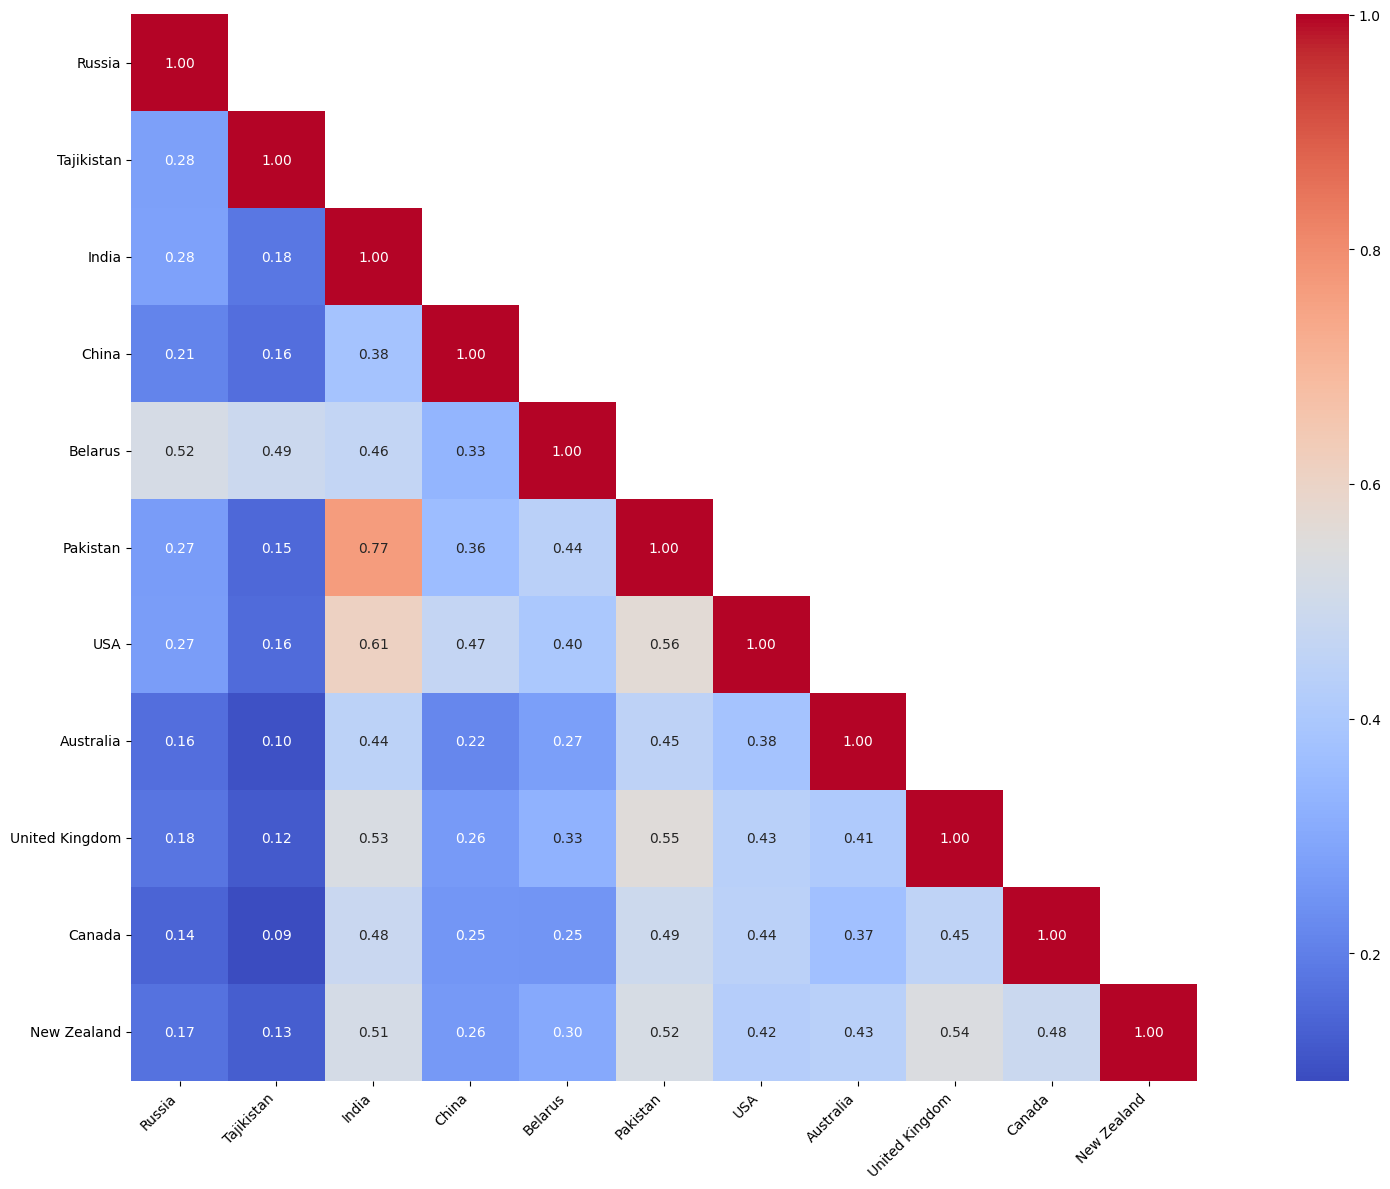

Semantic Embedding Cosine Similarity


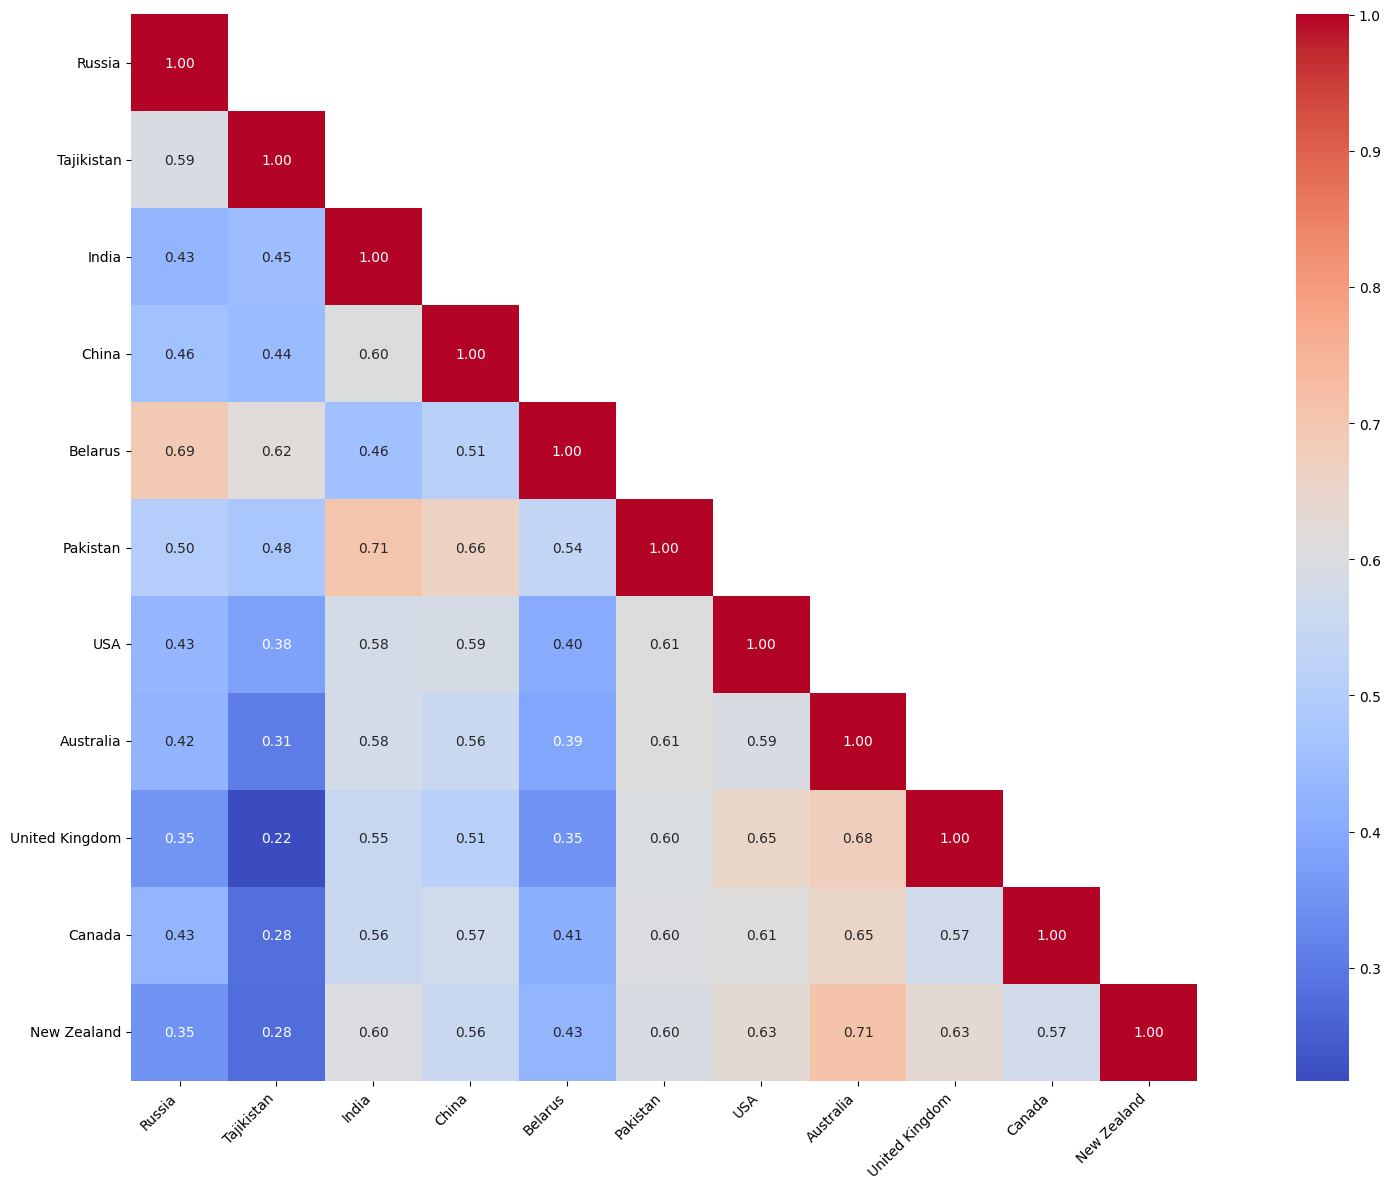

In [ ]:
# --- 5. Plot heatmaps ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create a mask for the upper triangle ---
mask = np.triu(np.ones_like(tfidf_df, dtype=bool), k=1)

# --- TF-IDF Cosine Similarity Heatmap ---
plt.figure(figsize=(20, 12))
sns.heatmap(tfidf_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True, mask=mask)
print('TF-IDF Cosine Similarity')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig("TF-IDF Cosine Similarity.png", bbox_inches='tight')
plt.show()
plt.close()

# --- Semantic Embedding Cosine Similarity Heatmap ---
mask2 = np.triu(np.ones_like(embedding_df, dtype=bool), k=1)

plt.figure(figsize=(20, 12))
sns.heatmap(embedding_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True, mask=mask2)
print('Semantic Embedding Cosine Similarity')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig("Semantic Embedding Cosine Similarity.png", bbox_inches='tight')
plt.show()
plt.close()
